In [ ]:
# Each plot will not open a new window
%matplotlib inline

# Python fundamental libraries
import os
import time
from collections import defaultdict
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as mpatches
import seaborn as sns
from tabulate import tabulate

# Import Data from drive


In [ ]:
# Load data
## Mount google drive 
from google.colab import drive
import os.path 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df1_wVideos = pd.read_csv('./gdrive/MyDrive/Dataset_Krikey/watchedVideo.csv',index_col = [0])
df1_wVideos.names = 'Watched_Videos'
df1_videos = pd.read_csv('./gdrive/MyDrive/Dataset_Krikey/videos.csv',index_col = [0]) 
df1_videos.names = 'videos'
df1_users = pd.read_csv('./gdrive/MyDrive/Dataset_Krikey/users.csv',index_col = [0]) 
df1_users.names = 'Users'
df1_feeds = pd.read_csv('./gdrive/MyDrive/Dataset_Krikey/feeds.csv',index_col = [0]) 
df1_feeds.names = 'Feeds'

df_array = [df1_wVideos, df1_videos, df1_users, df1_feeds]
df_array[0].names = df1_wVideos.names
df_array[1].names = df1_videos.names
df_array[2].names = df1_users.names
df_array[3].names = df1_feeds.names

## Check the dataframe columns and values

In [ ]:
for i, df in enumerate(df_array):
  print('\n' + str(i) + '. ' + df.names)
  print(tabulate(df.head(3), headers='keys', tablefmt='psql'))



0. Watched_Videos
+----+-----------------------------------------------+------+------------+--------------------------------------+--------------------------------------+--------------+---------------------+--------------------------------------+
|    | coordinates                                   | os   |   duration | videoId                              | userId                               | appVersion   | dateTime            | feedId                               |
|----+-----------------------------------------------+------+------------+--------------------------------------+--------------------------------------+--------------+---------------------+--------------------------------------|
|  0 | (Decimal('14.439490'), Decimal('105.291233')) | iOS  |       3.95 | 722e110c-2f81-46aa-9c25-4d26fd77519f | 317a2bc3-5f95-4d35-9a94-1f2f38424c4f | 2.2.2        | 2021-08-04 09:39:07 | 30134b9e-1b79-43fb-b0c5-373af9237b2c |
|  1 | (Decimal('40.866935'), Decimal('-73.845013')) | iOS  |    

## Rename column for easier recognition


In [ ]:
df1_wVideos.rename(columns = {'duration':'video_watch_duration'}, inplace = True)
df1_wVideos.rename(columns = {'dateTime':'video_watch_dateTime'}, inplace = True)
df1_videos.rename(columns = {'duration':'video_duration'}, inplace = True)
df1_videos.rename(columns = {'created_at':'video_created_at'}, inplace = True)
df1_users.rename(columns = {'created_at':'user_created_at'}, inplace = True)
df1_feeds.rename(columns = {'name':'feed_name'}, inplace = True)

# A glimpse of the variables and data statistics


In [ ]:
for i, df in enumerate(df_array):
  print('\n' + str(i) + '. ' + df.names)  
  print(tabulate(df.describe().transpose(), headers='keys', tablefmt='psql'))
  print(tabulate(df.describe(include ='object').transpose(), headers='keys', tablefmt='psql'))



0. Watched_Videos
+----------------------+---------+---------+---------+-------+-------+-------+-------+-------+
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|----------------------+---------+---------+---------+-------+-------+-------+-------+-------|
| video_watch_duration |   50000 | 3.41023 | 1.83826 |   0.1 |  2.05 |   3.3 |  4.88 |     7 |
+----------------------+---------+---------+---------+-------+-------+-------+-------+-------+
+----------------------+---------+----------+-----------------------------------------------+--------+
|                      |   count |   unique | top                                           |   freq |
|----------------------+---------+----------+-----------------------------------------------+--------|
| coordinates          |   50000 |    50000 | (Decimal('14.439490'), Decimal('105.291233')) |      1 |
| os                   |   50000 |        2 | Android                                       | 

# Check nan in the dataframe before going to the main data analysis

In [ ]:
## Check nan in the original dataset
for i,df in enumerate(df_array):
  print('There is NaN in ' + df.names) if(df.isnull().sum().sum()) else print('no NaN found in ' + df.names)    

no NaN found in Watched_Videos
no NaN found in videos
no NaN found in Users
no NaN found in Feeds


# Data clean up
1.  (Decimal(Latitude) ,Decimal(Longitude)) -->  (Latitude,Longitude) in Watched Video dataframe

In [ ]:
df1_wVideos['coordinates'] = df1_wVideos['coordinates'].apply(lambda x: x.replace("Decimal", ""))\
                            .apply(lambda x: x.replace("(", "")).apply(lambda x: x.replace(")", ""))\
                            .apply(lambda x: x.replace("'", ""))


In [ ]:
df1_wVideos.head(3)

,coordinates,os,video_watch_duration,videoId,userId,appVersion,video_watch_dateTime,feedId
0,"14.439490, 105.291233",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,"40.866935, -73.845013",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,"48.666850, 9.359456",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1


## 2. Get city name from the Coordinate 
Reference: https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/

https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6

Ref: Approiximate geolocation
https://stackoverflow.com/questions/59736682/find-nearest-location-coordinates-in-land-using-python

### Since it took long time to convert coordinate to address, conversion operation was done in the local computer and simply read in the colab
df1_wVideo_w_addr --> Original video_watch_duraion data frame with address

- The coordinate-to-address conversion python code can be found in the same directory where thie colab notebook is
  - Run **"coor_to_address.py"** on the local computer


In [ ]:
df1_wVideos_addr = pd.read_csv('./gdrive/MyDrive/Dataset_Krikey/df1_wVideo_w_addr.csv',index_col = [0])
df1_wVideos_addr.names = 'Watched_Videos'
df1_wVideos_addr.rename(columns = {'duration':'video_watch_duration'}, inplace = True)
df1_wVideos_addr.rename(columns = {'dateTime':'video_watch_dateTime'}, inplace = True)

In [ ]:
df1_wVideos_addr.head(3)

,os,video_watch_duration,videoId,userId,appVersion,video_watch_dateTime,feedId,address,country
coordinates,,,,,,,,,
"14.439490, 105.291233",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c,TH Changwat Ubon Ratchathani Na Chaluai,TH
"40.866935, -73.845013",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac,US New York Bronx Eastchester,US
"48.666850, 9.359456",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,DE Baden-Wuerttemberg Regierungsbezirk Stutt...,DE


# The first level individual dataframe analysis 

## Join all the tables together for easier data analysis
- Instead of original watched video dataframe, locally processed watched video dataframe including addressa and contry code will be used.

df1_wVideos --> df1_wVideos_addr

In [ ]:
df1_level_1 = pd.merge(df1_wVideos_addr, df1_videos, left_on='videoId',right_on='id').drop(columns='id')
print(tabulate(df1_level_1.head(3), headers='keys', tablefmt='psql'))
df1_level_2 = pd.merge(df1_level_1, df1_users, left_on='userId', right_on ='id').drop(columns='id')
print(tabulate(df1_level_2.head(3), headers='keys', tablefmt='psql'))
df1_level_3 = pd.merge(df1_level_2, df1_feeds, left_on='feedId', right_on ='id').drop(columns='id')
print(tabulate(df1_level_3.head(3), headers='keys', tablefmt='psql'))

+----+---------+------------------------+--------------------------------------+--------------------------------------+--------------+------------------------+--------------------------------------+---------------------------------------------+-----------+--------------------------------------+--------------------------------------+--------------------------------------+------------------+--------------------------------------+---------------------+--------------+--------------------------------------+---------+
|    | os      |   video_watch_duration | videoId                              | userId                               | appVersion   | video_watch_dateTime   | feedId                               | address                                     | country   | attribute_id                         | music_id                             | animation_id                         |   video_duration | creator                              | video_created_at    |   num_shares | game_id      

## User OS, Platform type, class, feed type check

In [ ]:
def pie_plot(fig, ax,  df, col_name, figure_position_row, figure_position_column, figure_title, filter_top_count = None):
    test =  df[col_name].value_counts().to_frame().reset_index()
    if filter_top_count:
        test =  test.iloc[1:filter_top_count,:]   
    test.rename(columns = {col_name: 'count'}, inplace = True)    
    test.rename(columns = {'index': col_name}, inplace = True)    
    ax[figure_position_row,figure_position_column].pie(test['count'], labels = test[col_name].to_list(), startangle = 90, autopct = '%1.1f%%')
    ax[figure_position_row,figure_position_column].set_title(figure_title, fontsize=15)

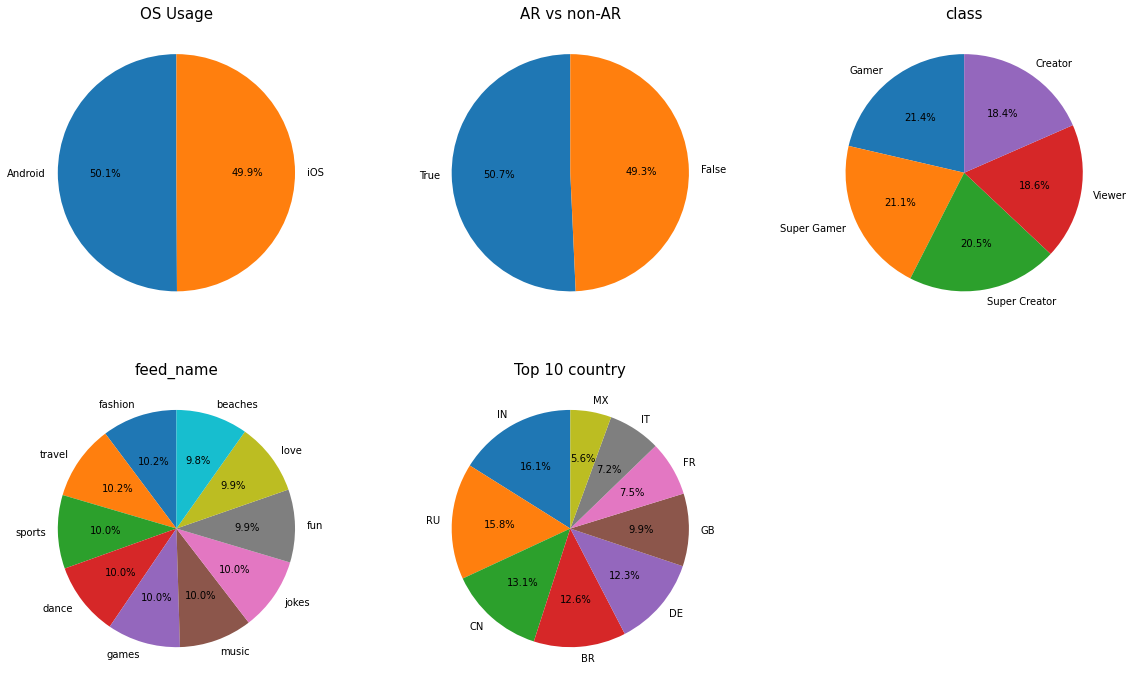

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,12))

pie_plot(fig, ax, df1_level_3, 'os', 0, 0, 'OS Usage')
pie_plot(fig, ax, df1_level_3, 'is_ar', 0, 1, 'AR vs non-AR')
pie_plot(fig, ax, df1_level_3, 'class', 0, 2, 'class')
pie_plot(fig, ax, df1_level_3, 'feed_name', 1, 0, 'feed_name')
pie_plot(fig, ax, df1_level_3, 'country', 1, 1, 'Top 10 country', 10)
ax[-1, -1].axis('off')
plt.show()

## Histogram plot for numerical variable
- Video watch duration 
- video contents length distribution
- Number of shares

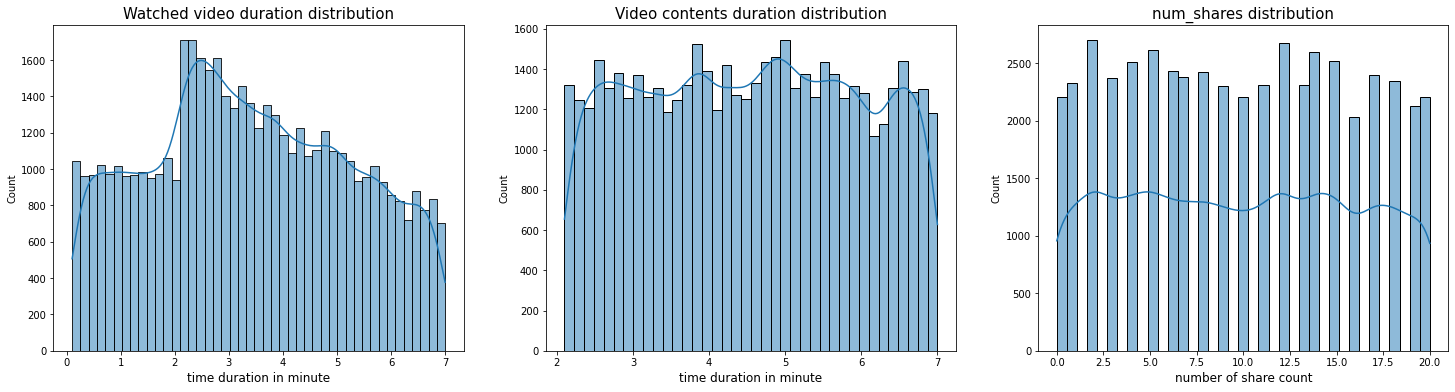

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (25,6))

sns.histplot(ax = ax[0],data = df1_level_3, x='video_watch_duration', kde=True)
ax[0].set_title('Watched video duration distribution', fontsize=15)
ax[0].set_xlabel('time duration in minute', fontsize=12)
sns.histplot(ax = ax[1],data = df1_level_3, x='video_duration', kde=True)
ax[1].set_title('Video contents duration distribution', fontsize=15)
ax[1].set_xlabel('time duration in minute', fontsize=12)
sns.histplot(ax = ax[2],data = df1_level_3, x='num_shares', kde=True)
ax[2].set_title('num_shares distribution', fontsize=15)
ax[2].set_xlabel('number of share count', fontsize=12)

plt.show()

## Encode Categorical variable based on cat.codes in pandas
- This method assigns unique integer to the categorical data

'videoId' ,'country', 'attribute_id', 'animation_id', 'music_id', 'creator',
'game_id', 'feedId' , 'userId', 'is_ar', 'class'

- Time and address are not included in this analysis

In [ ]:
df_cat = df1_level_3[['videoId','attribute_id','music_id','creator','game_id','feedId','country','os','feed_name','userId','is_ar','class']].astype('category')
df_cat_coded = df_cat.copy('deep')
for i in range(len(df_cat.columns)):
  df_cat_coded.iloc[:, i] = df_cat.iloc[:, i].cat.codes


In [ ]:
df_cat_coded.head(3)

,videoId,attribute_id,music_id,creator,game_id,feedId,country,os,feed_name,userId,is_ar,class
0,2137,3,0,256,4,1,122,1,0,186,0,0
1,881,8,6,520,3,1,122,1,0,186,1,0
2,1160,4,1,464,1,1,122,0,0,186,0,0


## Histogram plot for categorical variable

In [ ]:
def hist_plot(fig, ax,  df, col_name, figure_position_row, figure_position_column):
    sns.histplot(ax = ax[figure_position_row,figure_position_column], data = df, x = col_name, kde=True)
    ax[figure_position_row,figure_position_column].set_title(col_name, fontsize=15)
      

In [ ]:
n_row = 2
n_col = 6
fig, ax = plt.subplots(n_row,n_col, figsize = (30,10))
for i in range(len(df_cat_coded.columns)):
  hist_plot(fig, ax,  df_cat_coded, df_cat_coded.columns[i], int(i / (np.round(len(df_cat.columns)/2))) , int(i % (n_col)) )

ax[-1, -1].axis('off')
plt.show()

# Correlation analysis


## Correlation all data sets (numerical + Coded Categorical)

In [ ]:
## Concatenate numerical columns to the coded categorical dataframe

df_corr_input = pd.concat([df_cat_coded, df1_level_3[['num_shares', 'video_duration', 'video_watch_duration']]], axis = 1)
df_corr_input.head(3)

In [ ]:
plt.figure(figsize=(16, 6))
# Correlation is very weak. Need to adjust color bar range 
# Color bar range 
heatmap = sns.heatmap(df_corr_input.corr(), vmin=-0.05, vmax=0.05, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


## Correlation after dropping the least important 4 parameters that has abs(corr)< 0.005

- country,  class, os, userId

In [ ]:
fig, ax =  plt.subplots(1,2, figsize=(25, 8))
df_corr_input_filtered = df_corr_input.drop(columns =['class','country', 'os', 'userId'])
# Correlation is very weak. Need to adjust color bar range 
# Color bar range 
heatmap = sns.heatmap(df_corr_input_filtered.corr(), vmin=-0.05, vmax=0.05, annot=True, cmap='BrBG', ax=ax[0])
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap = sns.heatmap(df_corr_input_filtered.corr().abs(), vmin=0, vmax=0.05, annot=True, cmap='BrBG',ax=ax[1])
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


plt.show()


# Correlation of important key variables with other variables 
- Dependent variable : video watch duration 
  - To increase the video watch time, what variables needs to be reviewed

- Dependent variable : video
  - Is video related with other variables(music or game)  ? 

- Dependent variable : num_shares
  - To increase the number of video shares, what variables needs to be reviewed


    

In [ ]:
# dependent variable = video_watch_duration
fig, ax =  plt.subplots(1,3, figsize=(30, 8))

dependent_col = 'video_watch_duration'
heatmap = sns.heatmap(df_corr_input_filtered.corr()[[dependent_col]].sort_values(by=dependent_col, ascending=False), vmin=-0.05, vmax=0.05, annot=True, cmap='BrBG', ax=ax[0])
heatmap.set_title('Features Correlating with ' + dependent_col, fontdict={'fontsize':15}, pad=16);

dependent_col = 'game_id'
heatmap = sns.heatmap(df_cat_coded.corr()[[dependent_col]].sort_values(by=dependent_col, ascending=False), vmin=-0.05, vmax=0.05, annot=True, cmap='BrBG', ax=ax[1])
heatmap.set_title('Correlating with ' + dependent_col, fontdict={'fontsize':15}, pad=16);

dependent_col = 'num_shares'
heatmap = sns.heatmap(df_corr_input_filtered.corr()[[dependent_col]].sort_values(by=dependent_col, ascending=False), vmin=-0.05, vmax=0.05, annot=True, cmap='BrBG', ax=ax[2])
heatmap.set_title('Correlating with ' + dependent_col, fontdict={'fontsize':15}, pad=16);

## Identify the video chosen together with certain game and music 

### Correlated item search based on group by operation

In [ ]:
df_filtered_for_videoId = df1_level_3[['game_id', 'videoId', 'music_id', 'feedId', 'userId']]
df1_level_3_gr = df_filtered_for_videoId.groupby(['game_id', 'music_id'])['videoId']
df1_level_3_gr.describe()


### Correlated item search based on crosstab

In [ ]:
# Crosstab supports grouping as well. In this case, group the columns
## https://github.com/chris1610/pbpython/blob/master/notebooks/Crosstab_Explained.ipynb

df_cross = pd.crosstab([df_filtered_for_videoId.game_id, df_filtered_for_videoId.music_id], df_filtered_for_videoId.videoId )
df_cross

In [ ]:
df_cross.max(axis=1) ## Same result as above